In [4]:
!pip install seaborn


In [5]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Configure visualization style
sns.set(style='whitegrid')


In [6]:
# Load the dataset
df = pd.read_csv("data\Loan_default.csv")

# Display top 5 rows
df.head()


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [7]:
# Display shape of the dataset
print("Dataset Shape:", df.shape)

# Display column names
print("\nColumns in Dataset:")
print(df.columns.tolist())

# Display basic info (data types, non-null values)
df.info()


Dataset Shape: (255347, 18)

Columns in Dataset:
['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner', 'Default']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-nu

Missing Values in Each Column:

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


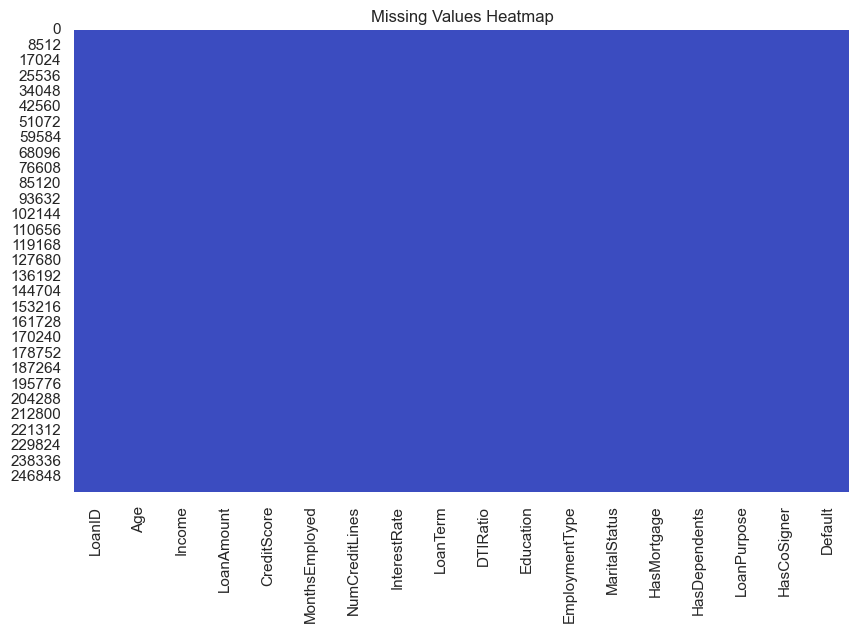

In [8]:
# Count missing values per column
missing_values = df.isnull().sum().sort_values(ascending=False)

print("Missing Values in Each Column:\n")
print(missing_values)

# Visualize missing values using a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm')
plt.title("Missing Values Heatmap")
plt.show()


In [9]:
# Summary statistics for numerical columns
df.describe()


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [10]:
# Display unique values in categorical columns
cat_cols = df.select_dtypes(include='object').columns
print("Categorical Columns:", cat_cols)

for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Categorical Columns: Index(['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

Value counts for LoanID:
LoanID
ZTH91CGL0B    1
I38PQUQS96    1
HPSK72WA7R    1
QU29Z1EVQI    1
QXBHNXNA9X    1
             ..
0HGZQKJ36W    1
H8GXPAOS71    1
A9S62RQ7US    1
EY08JDHTZP    1
V2KKSFM3UN    1
Name: count, Length: 255347, dtype: int64

Value counts for Education:
Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

Value counts for EmploymentType:
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64

Value counts for MaritalStatus:
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64

Value counts for HasMortgage:
HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64

Value counts for HasDependents

In [11]:
# Display numerical columns
num_cols = df.select_dtypes(include=np.number).columns
print("Numerical Columns:", num_cols)

# Check for potential outliers
df[num_cols].describe().T


Numerical Columns:

 Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default'],
      dtype='object')


,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0


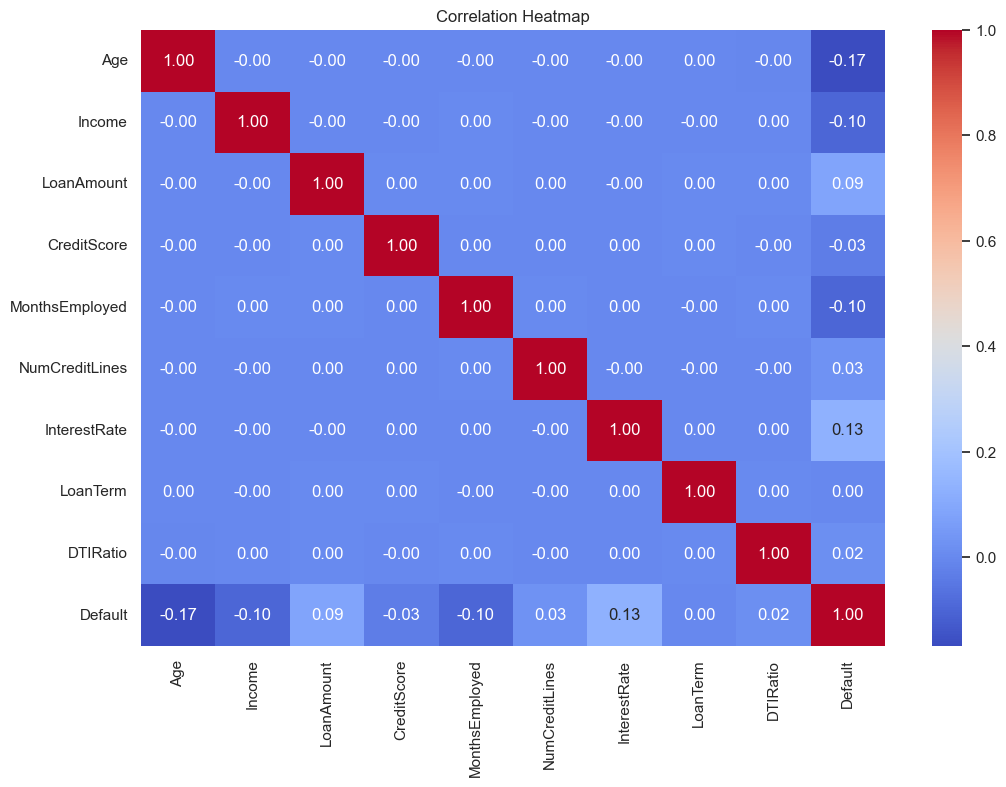

In [12]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


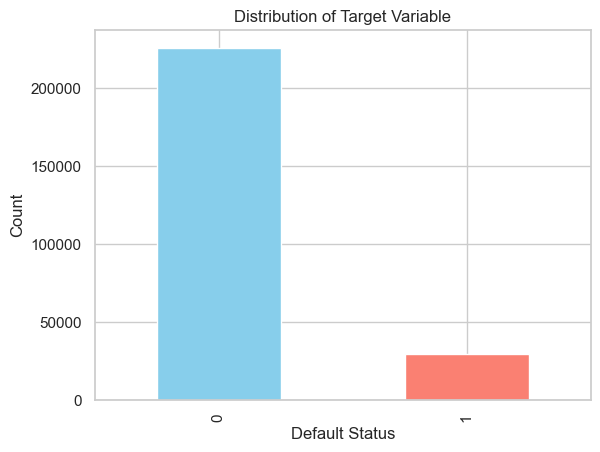

In [13]:
# Check target variable distribution
target_col = 'Default'  # <-- change this if your target column has another name
df[target_col].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribution of Target Variable")
plt.xlabel("Default Status")
plt.ylabel("Count")
plt.show()


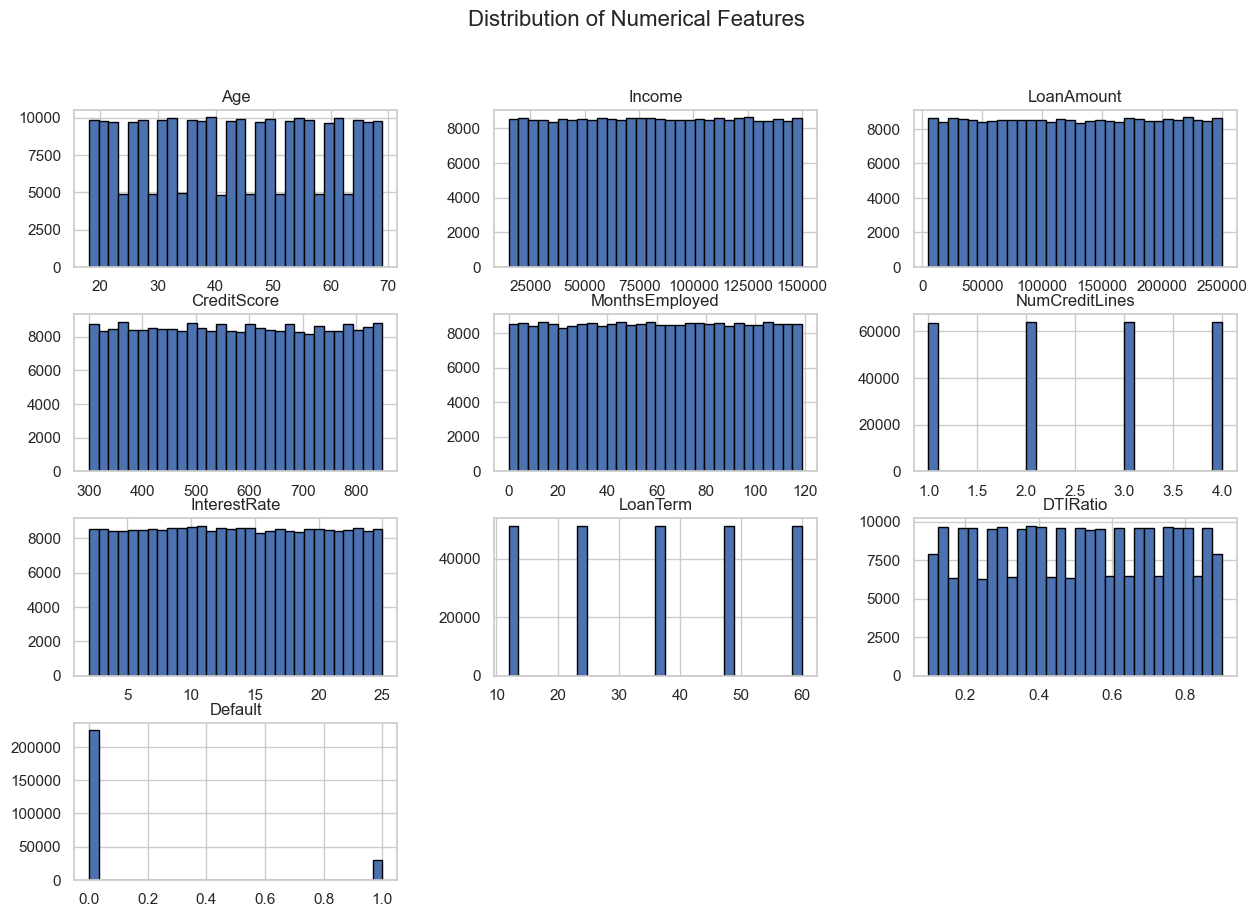

In [14]:
# Plot distributions for numerical columns
df[num_cols].hist(figsize=(15,10), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


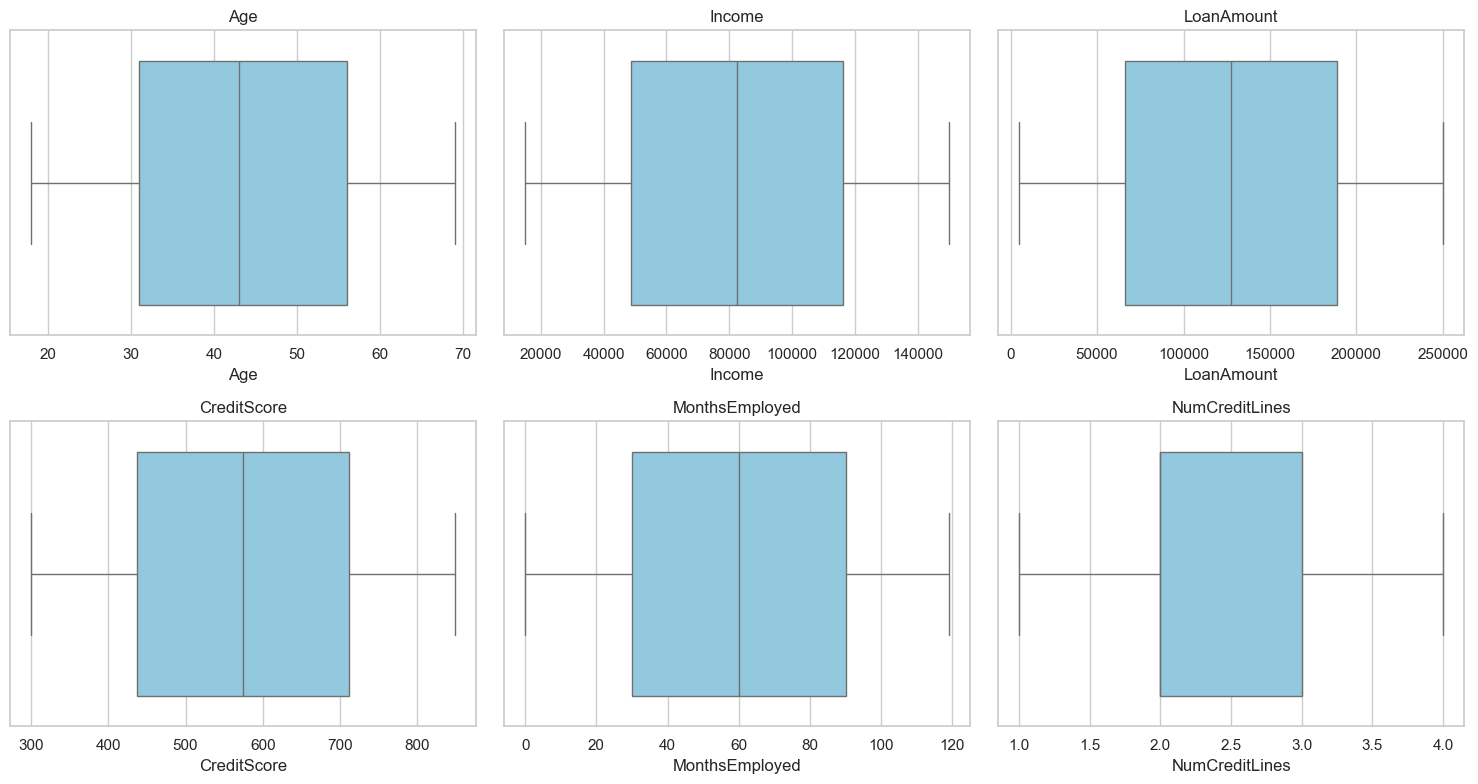

In [15]:
# Visualize outliers for each numerical column
plt.figure(figsize=(15,8))
for i, col in enumerate(num_cols[:6]):  # show first 6 columns
    plt.subplot(2,3,i+1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()


C:\Users\saich\AppData\Local\Temp\ipykernel_12556\1686111237.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette='Set2')


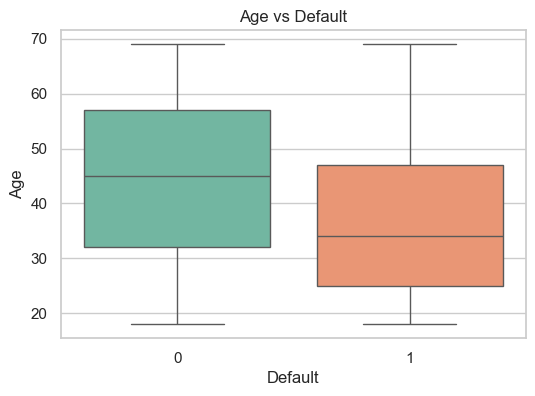

C:\Users\saich\AppData\Local\Temp\ipykernel_12556\1686111237.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette='Set2')


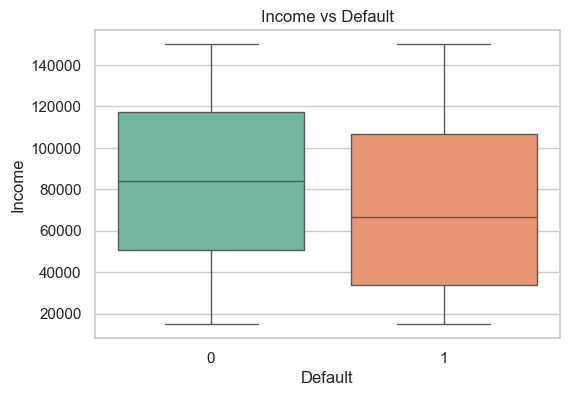

C:\Users\saich\AppData\Local\Temp\ipykernel_12556\1686111237.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette='Set2')


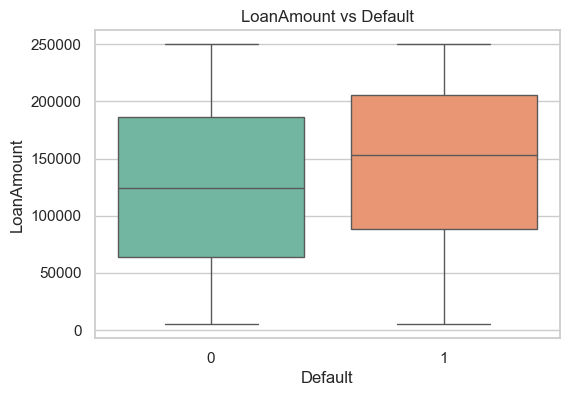

C:\Users\saich\AppData\Local\Temp\ipykernel_12556\1686111237.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette='Set2')


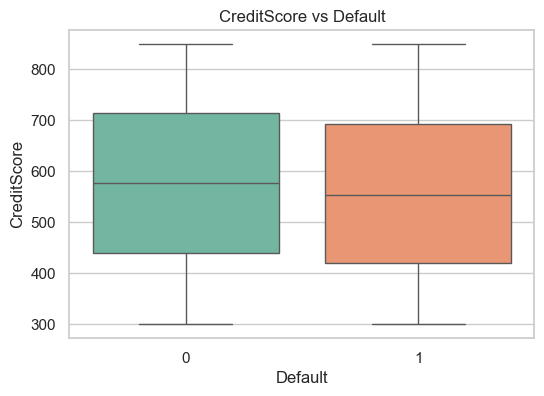

C:\Users\saich\AppData\Local\Temp\ipykernel_12556\1686111237.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette='Set2')


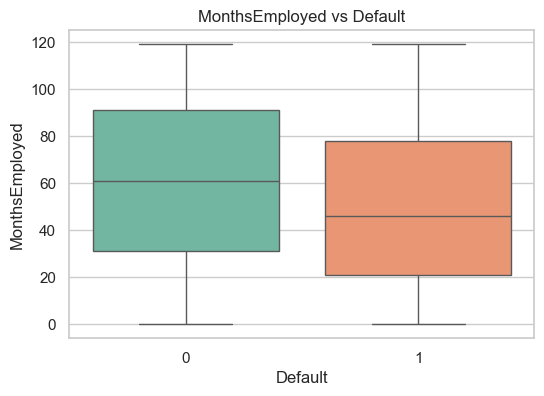

C:\Users\saich\AppData\Local\Temp\ipykernel_12556\1686111237.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette='Set2')


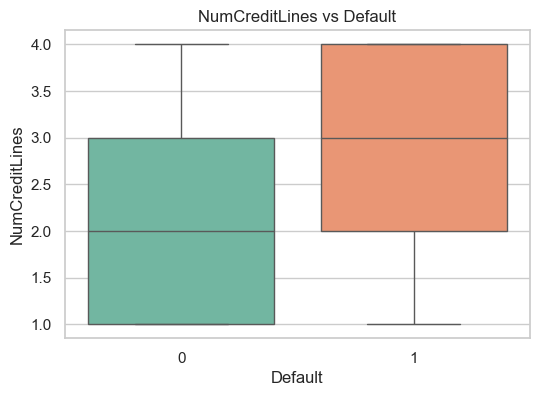

C:\Users\saich\AppData\Local\Temp\ipykernel_12556\1686111237.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette='Set2')


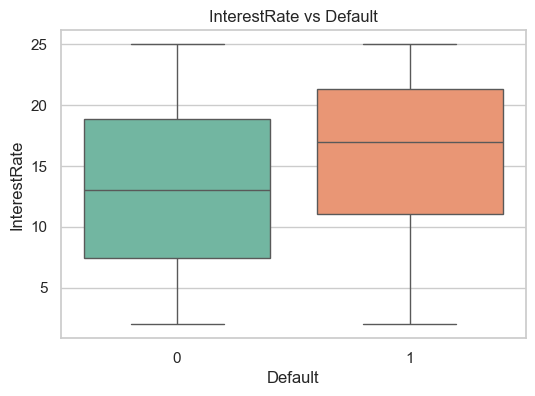

C:\Users\saich\AppData\Local\Temp\ipykernel_12556\1686111237.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette='Set2')


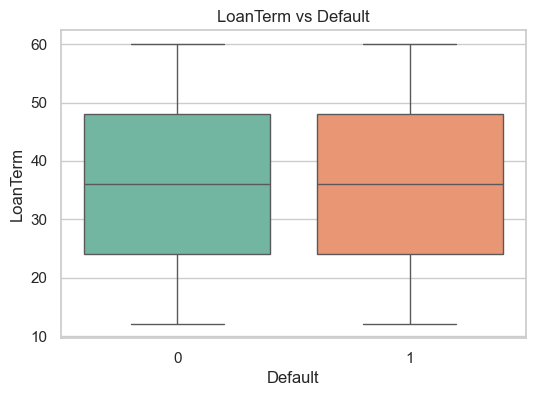

C:\Users\saich\AppData\Local\Temp\ipykernel_12556\1686111237.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette='Set2')


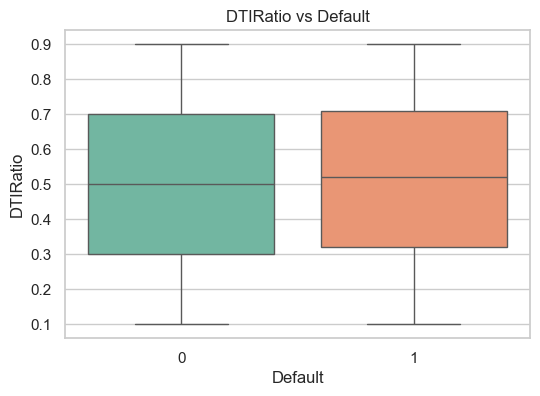

C:\Users\saich\AppData\Local\Temp\ipykernel_12556\1686111237.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette='Set2')


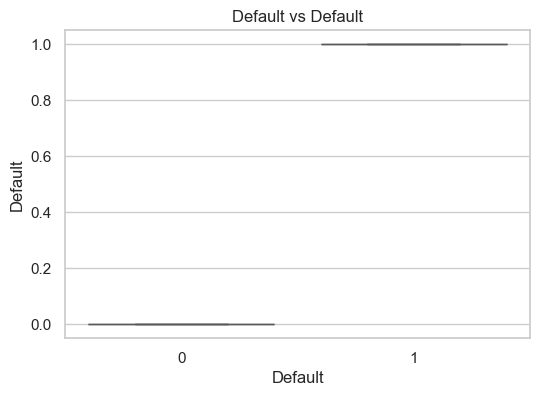

In [17]:
# Boxplot to see how numerical features vary by target
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=target_col, y=col, data=df, palette='Set2')
    plt.title(f"{col} vs {target_col}")
    plt.show()


In [18]:
# Example: Fill missing numeric values with median and categorical with mode
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values handled successfully!")


C:\Users\saich\AppData\Local\Temp\ipykernel_12556\2408465995.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\saich\AppData\Local\Temp\ipykernel_12556\2408465995.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

Missing values handled successfully!


In [21]:
!pip install scikit-learn


   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------- ----------------------------- 2.4/8.9 MB 13.4 MB/s eta 0:00:01
   ----------------------- ---------------- 5.2/8.9 MB 12.7 MB/s eta 0:00:01
   ------------------------------------- -- 8.4/8.9 MB 13.3 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 12.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.3 MB ? eta -:--:--
   -- ------------------------------------- 2.4/41.3 MB 11.2 MB/s eta 0:00:04
   --- ------------------------------------ 3.9/41.3 MB 9.4 MB/s eta 0:00:04
   ---- ----------------------------------- 5.0/41.3 MB 7.4 MB/s eta 0:00:05
   ----- ---------------------------------- 5.2/41.3 MB 6.8 MB/s eta 0:00:06
   ----- ---------------------------------- 5.5/41.3 MB 5.6 MB/s eta 0:00:07
   ----- ---------------------------------- 5.8/41.3 MB 4.5 MB/s eta 0:00:08
   ----- ---------------------------------- 6.0/41.3 MB 3.8 MB/s eta 0:00:10
   ----- ----

In [22]:
# Efficient encoding without memory errors
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Skip columns with too many unique values (e.g., IDs, names)
cat_cols_limited = [col for col in cat_cols if df[col].nunique() <= 50]

# Label encode low-cardinality categorical columns
le = LabelEncoder()
for col in cat_cols_limited:
    df[col] = le.fit_transform(df[col].astype(str))

print("Categorical encoding completed successfully!")
print(f"Encoded columns: {cat_cols_limited}")
df.info()


Categorical encoding completed successfully!
Encoded columns: ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  int64  
 11  EmploymentType  255347 non-null  int64  
 12  MaritalStatus   255347 non-null  int64  
 13  HasMortgage     25534

In [24]:
print("Final Dataset Shape:", df.shape)
df.head()


Final Dataset Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0
